In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import datetime
import warnings
import geopandas as gpd

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
parquet_file= r'C:\My d drive\Softwear\green_tripdata_2022-01.parquet'
df= pd.read_parquet(parquet_file)

In [3]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [4]:
csv_file= r'C:\My d drive\Softwear\green_tripdata_2022-01.csv'
df.to_csv(csv_file, index=False)

In [5]:
df.shape


(62495, 20)

In [6]:

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [7]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [8]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [9]:
df['lpep_pickup_datetime']= pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime']= pd.to_datetime(df['lpep_dropoff_datetime'])
df['pickup_day']=df['lpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['lpep_dropoff_datetime'].dt.day_name()

In [10]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_day,dropoff_day
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00,Saturday,Saturday
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00,Saturday,Saturday
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75,Saturday,Saturday
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,Saturday,Saturday
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75,Saturday,Saturday


In [11]:
df['VendorID'].value_counts()

VendorID
2    53090
1     9405
Name: count, dtype: int64

In [12]:
df['pickup_month']=pd.DatetimeIndex(df['lpep_pickup_datetime']).month
df['Dropoff_month']=pd.DatetimeIndex(df['lpep_dropoff_datetime']).month

In [13]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_day,dropoff_day,pickup_month,Dropoff_month
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,None,0.3,4.80,2.0,1.0,0.00,Saturday,Saturday,1,1
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,None,0.3,10.80,2.0,1.0,0.00,Saturday,Saturday,1,1
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,None,0.3,23.15,1.0,1.0,2.75,Saturday,Saturday,1,1
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,None,0.3,9.30,2.0,1.0,0.00,Saturday,Saturday,1,1
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,None,0.3,31.26,1.0,1.0,2.75,Saturday,Saturday,1,1


In [14]:
df['pickup_day'].value_counts()

pickup_day
Monday       10573
Thursday      9546
Friday        9274
Wednesday     9135
Tuesday       8887
Sunday        7614
Saturday      7466
Name: count, dtype: int64

In [15]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_month,Dropoff_month
count,62495.000000,62495,62495,56200.000000,62495.000000,62495.000000,56200.000000,62495.000000,62495.000000,62495.00000,62495.000000,62495.000000,62495.000000,62495.000000,62495.000000,56200.000000,56200.000000,56200.000000,62495.000000,62495.000000
mean,1.849508,2022-01-16 14:18:36.026353920,2022-01-16 14:37:37.189551104,1.198719,97.615041,135.969902,1.258399,77.758632,13.914000,0.34756,0.426322,1.666540,0.208182,0.297312,17.490532,1.403594,1.040925,0.706628,1.000528,1.000560
min,1.000000,2009-01-01 00:34:01,2009-01-01 17:05:20,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.50000,-0.500000,-0.860000,-6.550000,-0.300000,-71.850000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2022-01-08 23:41:50,2022-01-08 23:55:28.500000,1.000000,55.000000,74.000000,1.000000,1.080000,7.000000,0.00000,0.500000,0.000000,0.000000,0.300000,9.360000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,2022-01-16 15:59:42,2022-01-16 16:17:00,1.000000,75.000000,137.000000,1.000000,1.900000,10.500000,0.00000,0.500000,1.000000,0.000000,0.300000,13.860000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,2.000000,2022-01-24 09:16:50,2022-01-24 09:37:28,1.000000,130.000000,215.000000,1.000000,3.500000,17.000000,0.50000,0.500000,2.610000,0.000000,0.300000,21.050000,2.000000,1.000000,2.750000,1.000000,1.000000
max,2.000000,2022-01-31 23:57:37,2022-02-01 21:01:54,5.000000,265.000000,265.000000,8.000000,224481.380000,604.500000,4.50000,0.500000,76.770000,44.750000,0.300000,605.300000,5.000000,2.000000,2.750000,12.000000,12.000000
std,0.357556,NaN,NaN,0.862313,62.987311,77.590956,0.877743,2909.354163,12.088819,0.65781,0.181381,2.484928,1.257659,0.037201,13.623416,0.516316,0.198119,1.201632,0.076212,0.063875


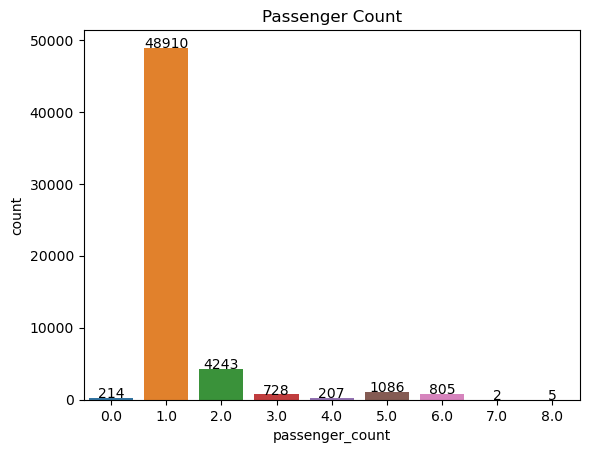

In [16]:
ax= sns.countplot(x=df['passenger_count'])
plt.title('Passenger Count')
for p in ax.patches:
    height= p.get_height()
    ax.text(x= p.get_x()+(p.get_width()/2),
    y= height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()

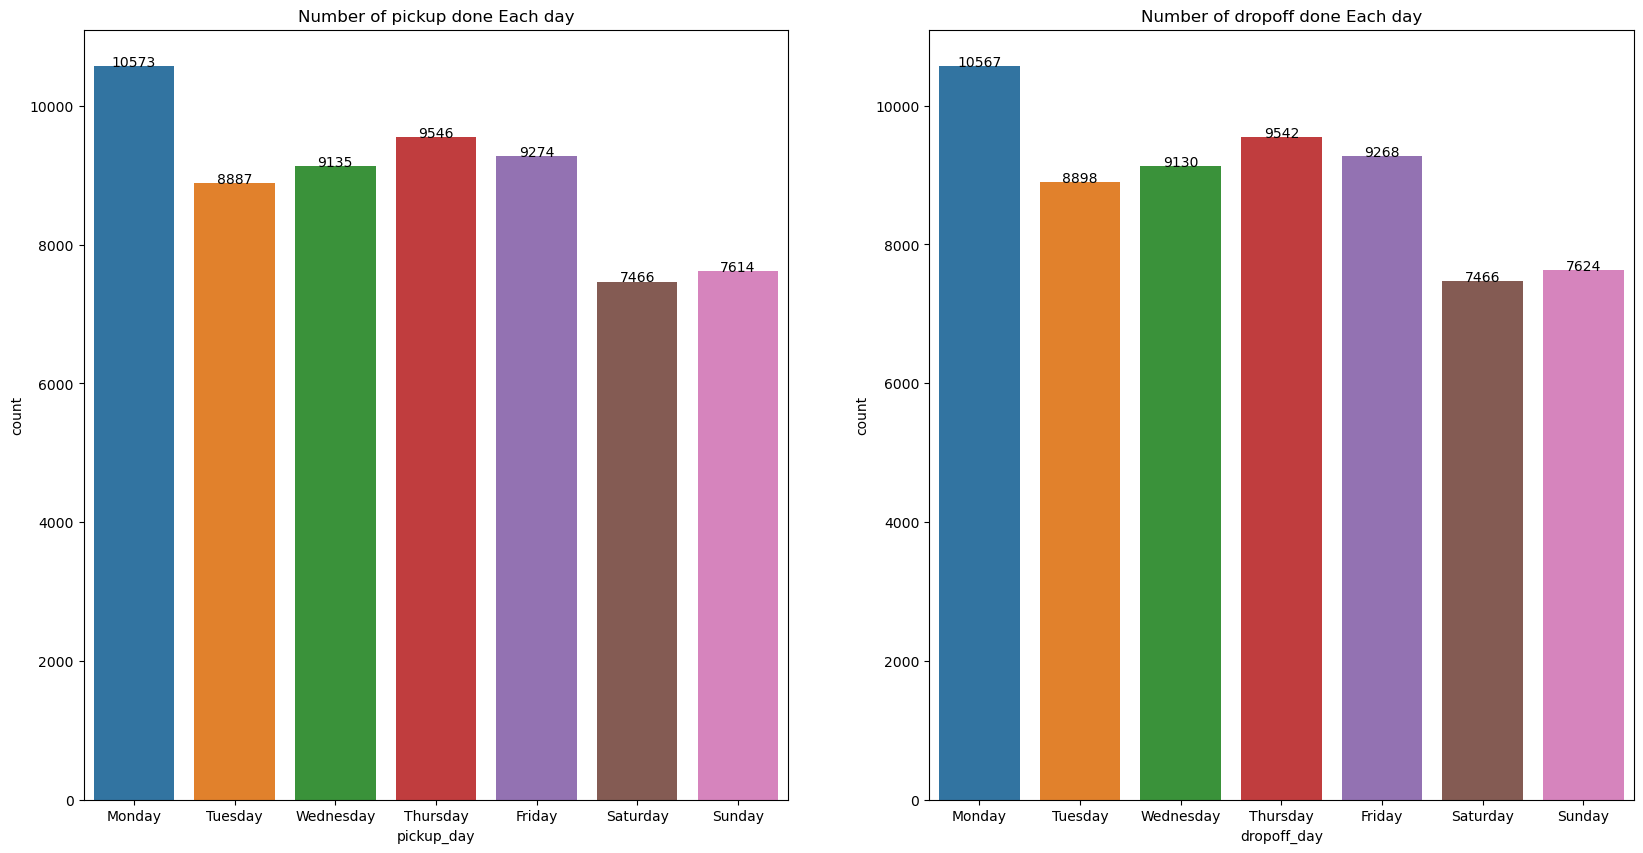

In [17]:
figure, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='pickup_day', data=df, ax=ax[0], order=weekdays)
ax[0].set_title('Number of pickup done Each day')
for p in ax[0].patches:
    height= p.get_height()
    ax[0].text(x= p.get_x()+(p.get_width()/2),
    y= height+0.2, ha='center', s='{:.0f}'.format(height))

sns.countplot(x='dropoff_day', data=df, ax=ax[1], order=weekdays)
ax[1].set_title('Number of dropoff done Each day')
for p in ax[1].patches:
    height= p.get_height()
    ax[1].text(x= p.get_x()+(p.get_width()/2),
    y= height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()


<Axes: xlabel='timezone', ylabel='count'>

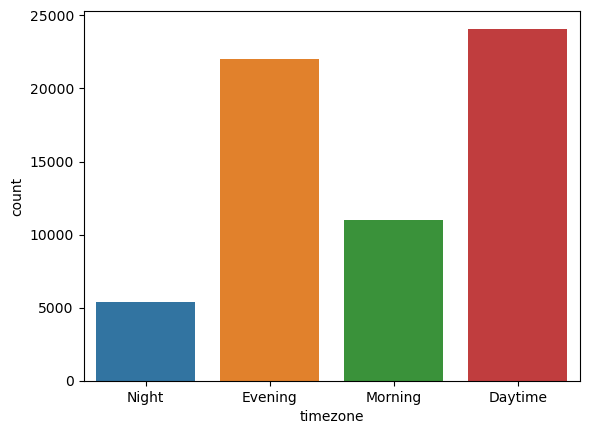

In [18]:
def timezone(x):
    if x >= datetime.time(4,0,1) and x<datetime.time(10,0,0):
        return 'Morning'
    
    elif x >= datetime.time(10,0,1) and x<datetime.time(16,0,0):
        return 'Daytime'

    elif x >= datetime.time(16,0,1) and x<datetime.time(22,0,0):
        return 'Evening'
    
    elif x >= datetime.time(22,0,1) or x<datetime.time(4,0,0):
        return 'Night'


df['pickup_time'] = df['lpep_pickup_datetime'].dt.time

df['timezone'] = df['pickup_time'].apply(timezone)

sns.countplot(x='timezone', data=df)

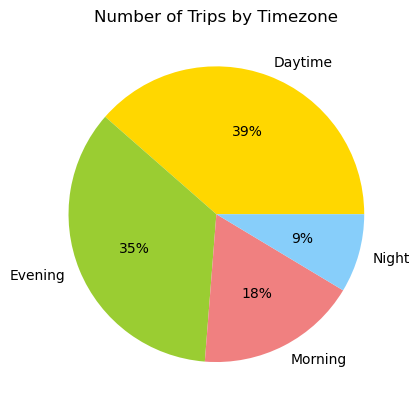

In [19]:
def timezone(x):
    if x >= datetime.time(4,0,1) and x<datetime.time(10,0,0):
        return 'Morning'
    
    elif x >= datetime.time(10,0,1) and x<datetime.time(16,0,0):
        return 'Daytime'

    elif x >= datetime.time(16,0,1) and x<datetime.time(22,0,0):
        return 'Evening'
    
    elif x >= datetime.time(22,0,1) or x<datetime.time(4,0,0):
        return 'Night'


df['pickup_time'] = df['lpep_pickup_datetime'].dt.time


df['timezone'] = df['pickup_time'].apply(timezone)

data = df['timezone'].value_counts()
labels = data.index
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(data, labels=labels, colors=colors, autopct='%1.0f%%')

plt.title('Number of Trips by Timezone')
plt.show()


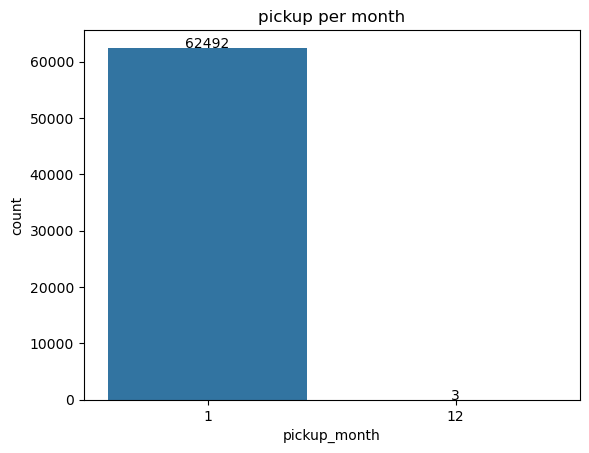

In [20]:
ax= sns.countplot(x=df['pickup_month'])
plt.title('pickup per month')
for p in ax.patches:
    height= p.get_height()
    ax.text(x= p.get_x()+(p.get_width()/2),
    y= height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()

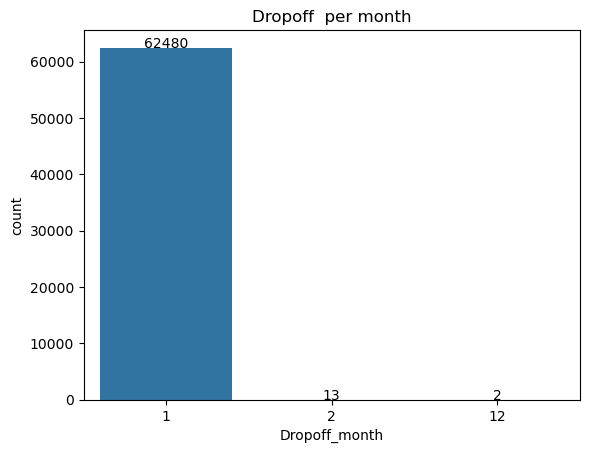

In [21]:
ax= sns.countplot(x=df['Dropoff_month'])
plt.title('Dropoff  per month')
for p in ax.patches:
    height= p.get_height()
    ax.text(x= p.get_x()+(p.get_width()/2),
    y= height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()

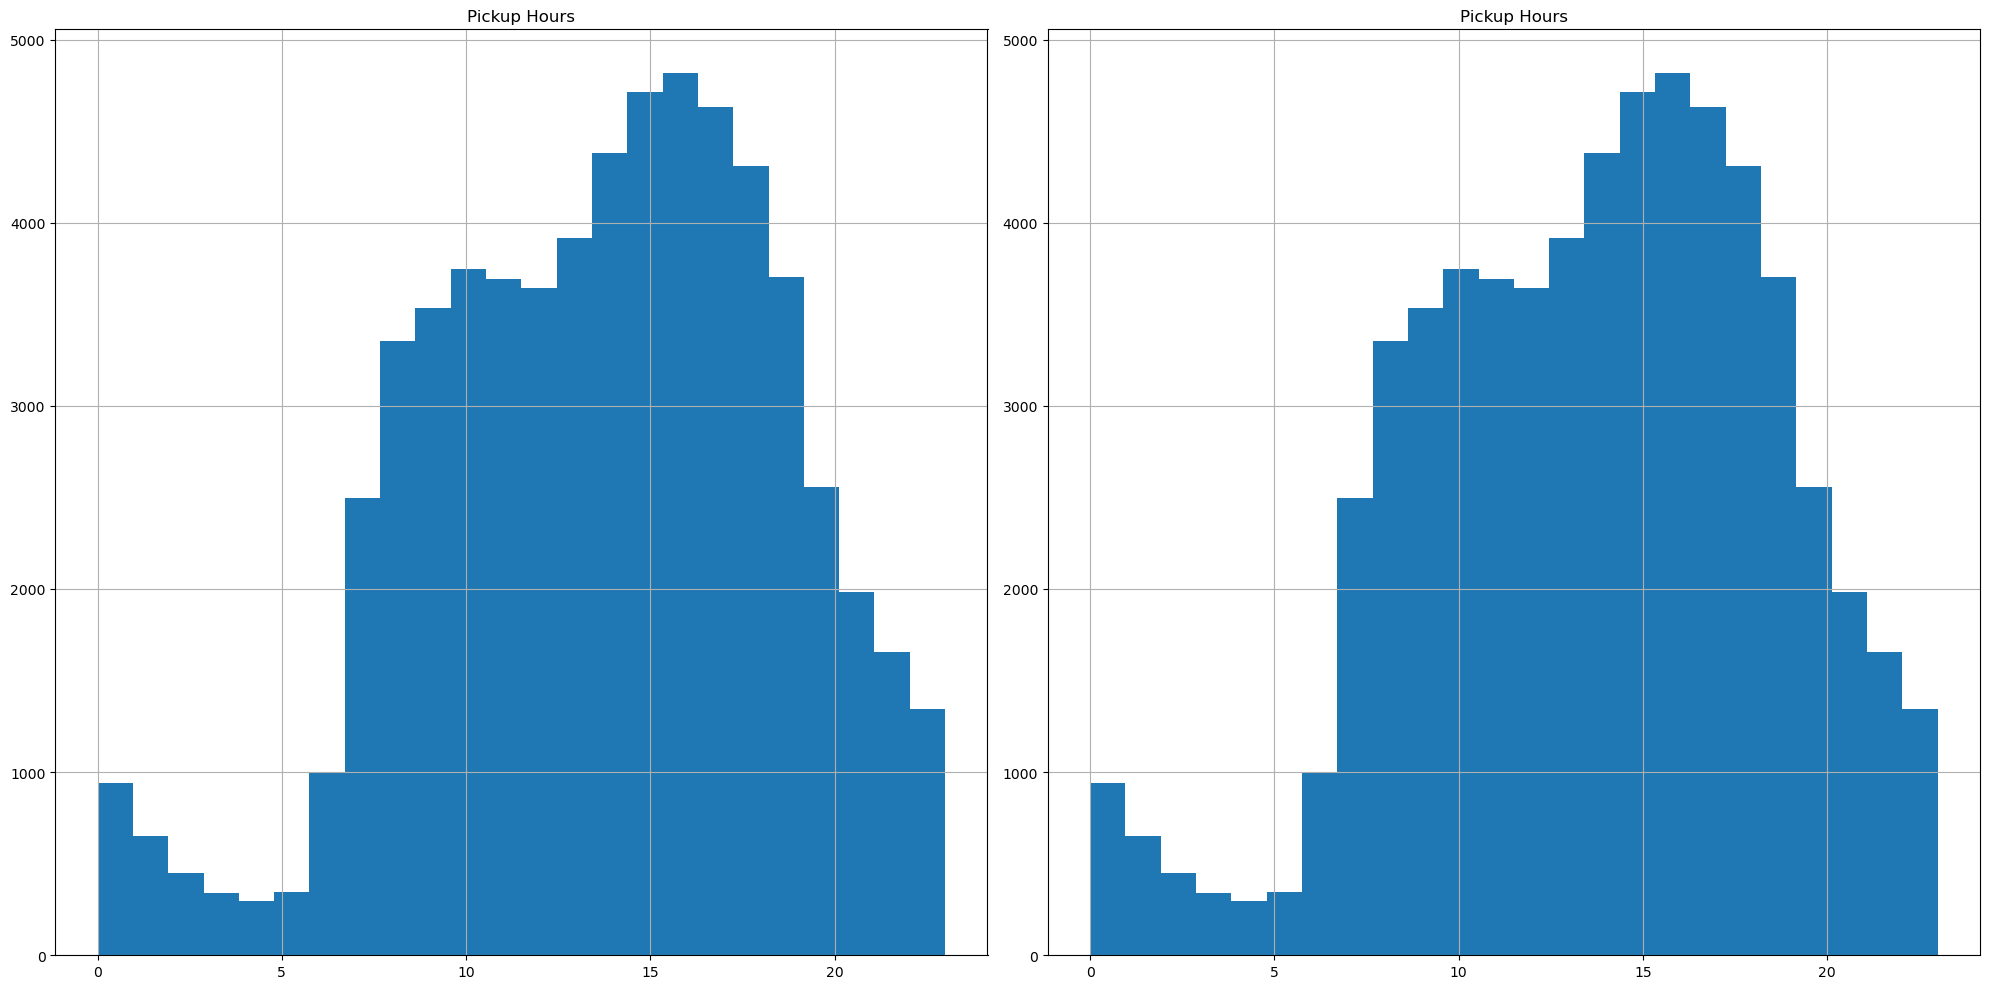

In [22]:
figure, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,10))

df['pickup_hour']=df['lpep_pickup_datetime'].dt.hour

df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Pickup Hours')



df['dropoff_hour']=df['lpep_dropoff_datetime'].dt.hour

df.pickup_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Pickup Hours')
plt.tight_layout()

In [23]:
pickup_counts = df.groupby('PULocationID').count()['VendorID']
dropoff_counts = df.groupby('DOLocationID').count()['VendorID']

# Sort the data by the count of each PULocationID and DOLocationID
pickup_counts = pickup_counts.sort_values(ascending=False)
dropoff_counts = dropoff_counts.sort_values(ascending=False)


n = 10
top_pickup = pickup_counts.head(n)
top_dropoff = dropoff_counts.head(n)

print('Top', n, 'most popular pickup locations:')
print(top_pickup)

print('Top', n, 'most popular dropoff locations:')
print(top_dropoff)

Top 10 most popular pickup locations:
PULocationID
74     9728
75     8152
41     4904
42     2693
166    2635
95     2561
97     2240
7      2068
43     1916
244    1881
Name: VendorID, dtype: int64
Top 10 most popular dropoff locations:
DOLocationID
74     3371
75     2957
42     2563
41     2446
236    2075
238    1912
166    1581
263    1420
151    1282
239    1151
Name: VendorID, dtype: int64


In [24]:
df['trip_date'] = df['lpep_pickup_datetime'].dt.date
df['trip_date'] = df['trip_date'].astype('category')

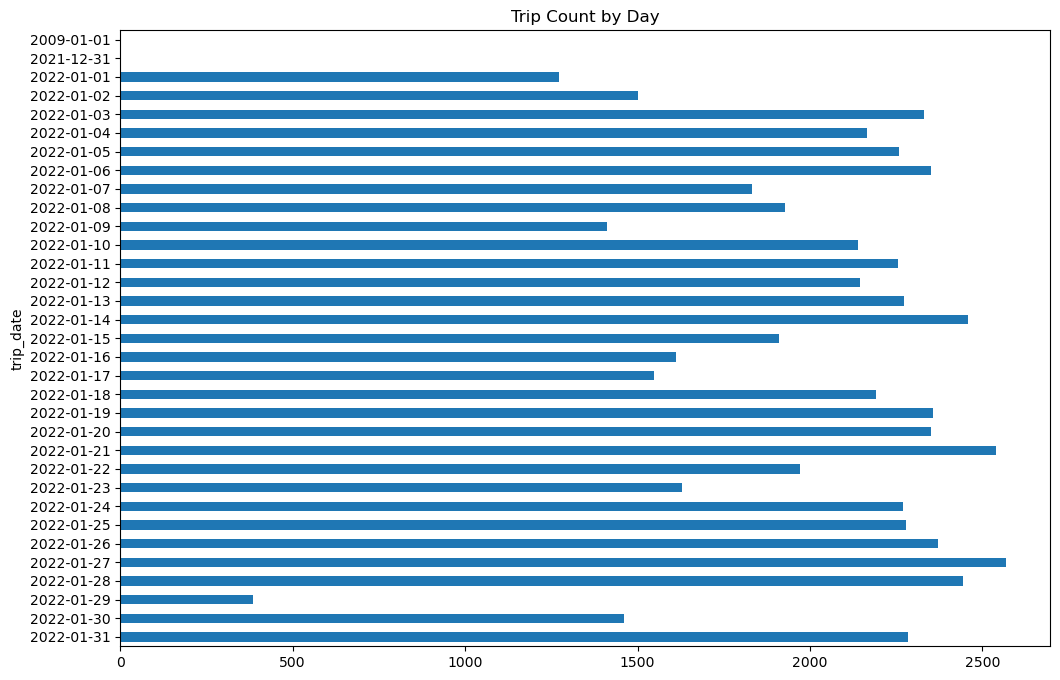

In [25]:
plt.figure(figsize = (12,8))

(
    df['trip_date']
    .value_counts()
    .sort_index(ascending=False)
    .plot(kind='barh', title='Trip Count by Day')
)
plt.show()

In [26]:
print('number of unique PULocationIDs:', df['PULocationID'].nunique())
print('number of unique DOLocationIDs:', df['DOLocationID'].nunique())

number of unique PULocationIDs: 231
number of unique DOLocationIDs: 240


In [27]:
df['PULocationID'] = df['PULocationID'].astype('category')
df['DOLocationID'] = df['DOLocationID'].astype('category')

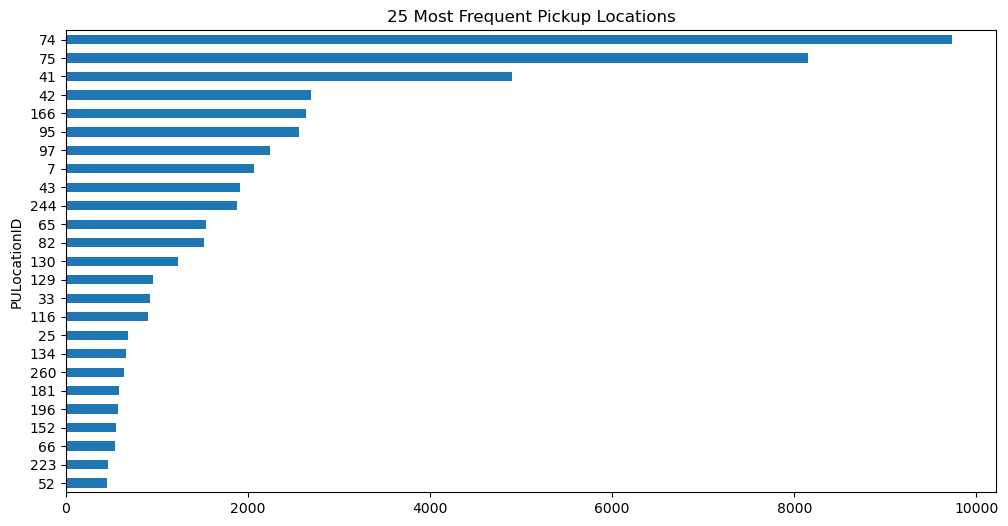

In [28]:
plt.figure(figsize = (12,6))
(
    df['PULocationID']
    .value_counts
    ()
    .head(25)
    .sort_values()
    .plot(kind='barh', title='25 Most Frequent Pickup Locations')
)
plt.show()

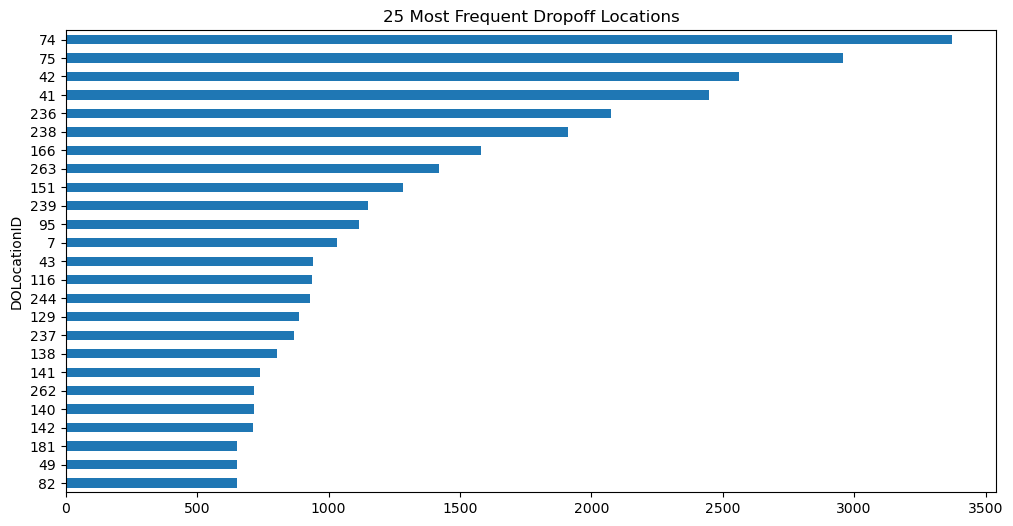

In [29]:
plt.figure(figsize = (12,6))
(
    df['DOLocationID']
    .value_counts()
    .head(25)
    .sort_values()
    .plot(kind='barh', title='25 Most Frequent Dropoff Locations')
)
plt.show()

In [30]:
round(df['trip_distance'].describe(),2)

count     62495.00
mean         77.76
std        2909.35
min           0.00
25%           1.08
50%           1.90
75%           3.50
max      224481.38
Name: trip_distance, dtype: float64

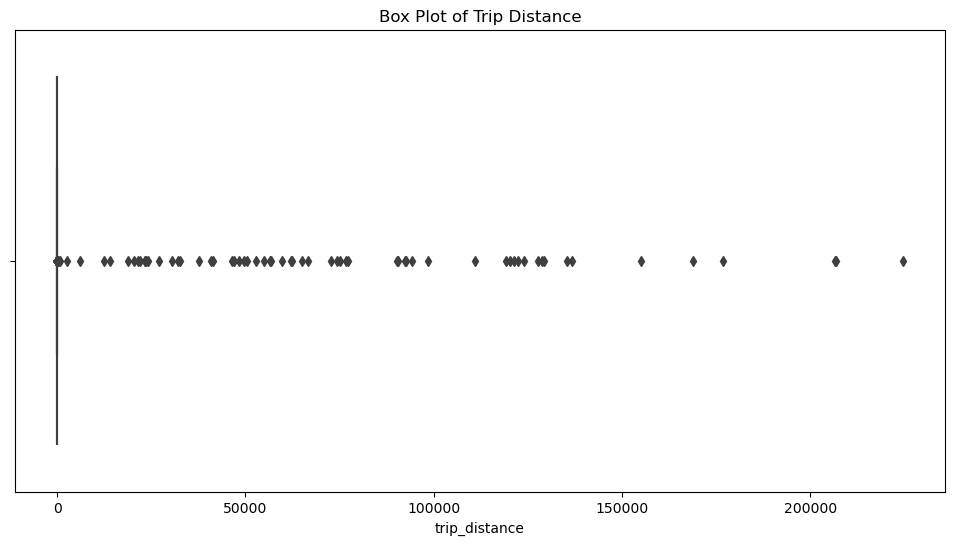

In [31]:
plt.figure(figsize = (12,6))

sns.boxplot(x=df['trip_distance']).set_title('Box Plot of Trip Distance')

plt.show()

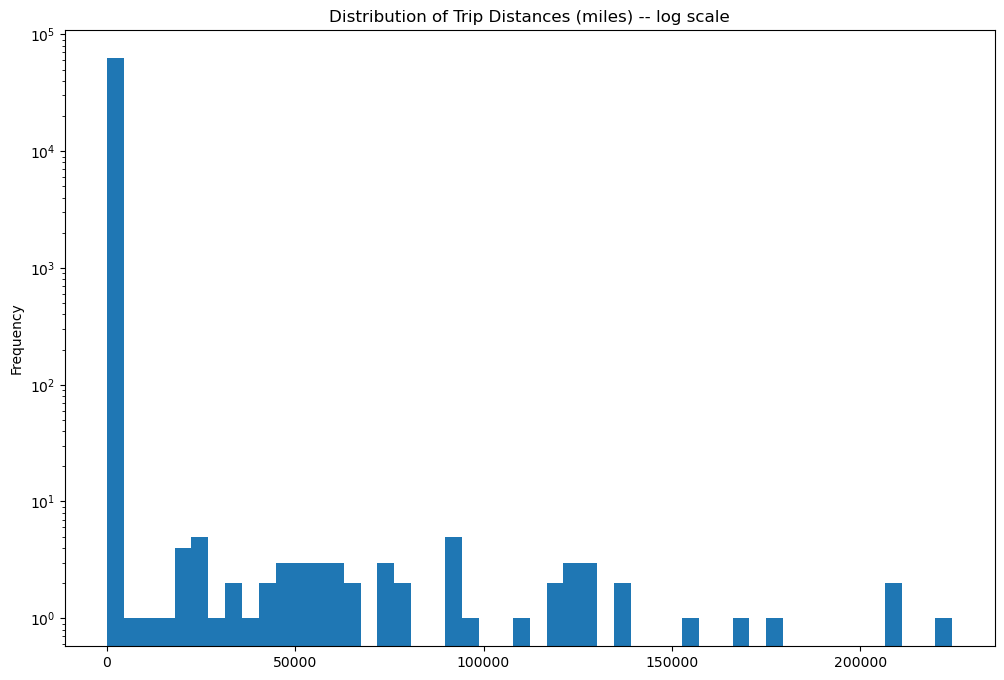

In [32]:
plt.figure(figsize = (12,8))

df['trip_distance'].plot(kind='hist', 
                                bins = 50,
                                log = True,
                                title = 'Distribution of Trip Distances (miles) -- log scale')

plt.show()

In [33]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                   category
DOLocationID                   category
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
pickup_day                       object
dropoff_day                      object
pickup_month                      int32
Dropoff_month                     int32
pickup_time                      object


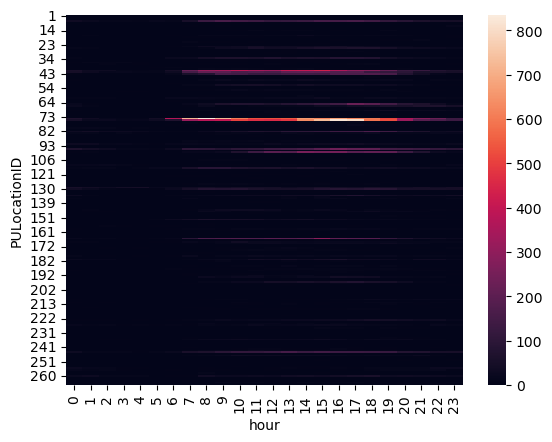

In [34]:


# Create a new column for the hour of the day
df['hour'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.hour

# Create a frequency table of the pickup locations and the hours of the day
freq_table = pd.crosstab(df['PULocationID'], df['hour'])

# Visualize the frequency table as a heatmap
sns.heatmap(freq_table)
plt.show()

# Visualize the frequency table as a clustered heatmap
#sns.clustermap(freq_table)
#plt.show()


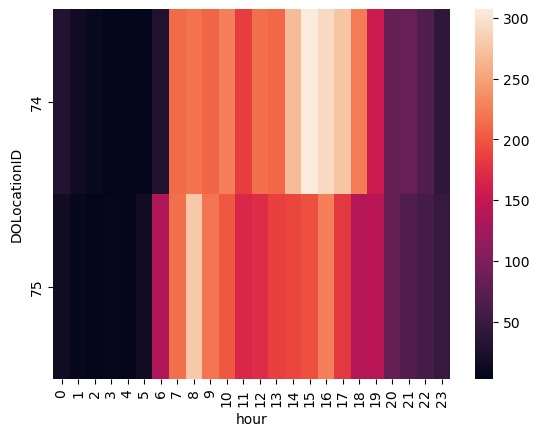

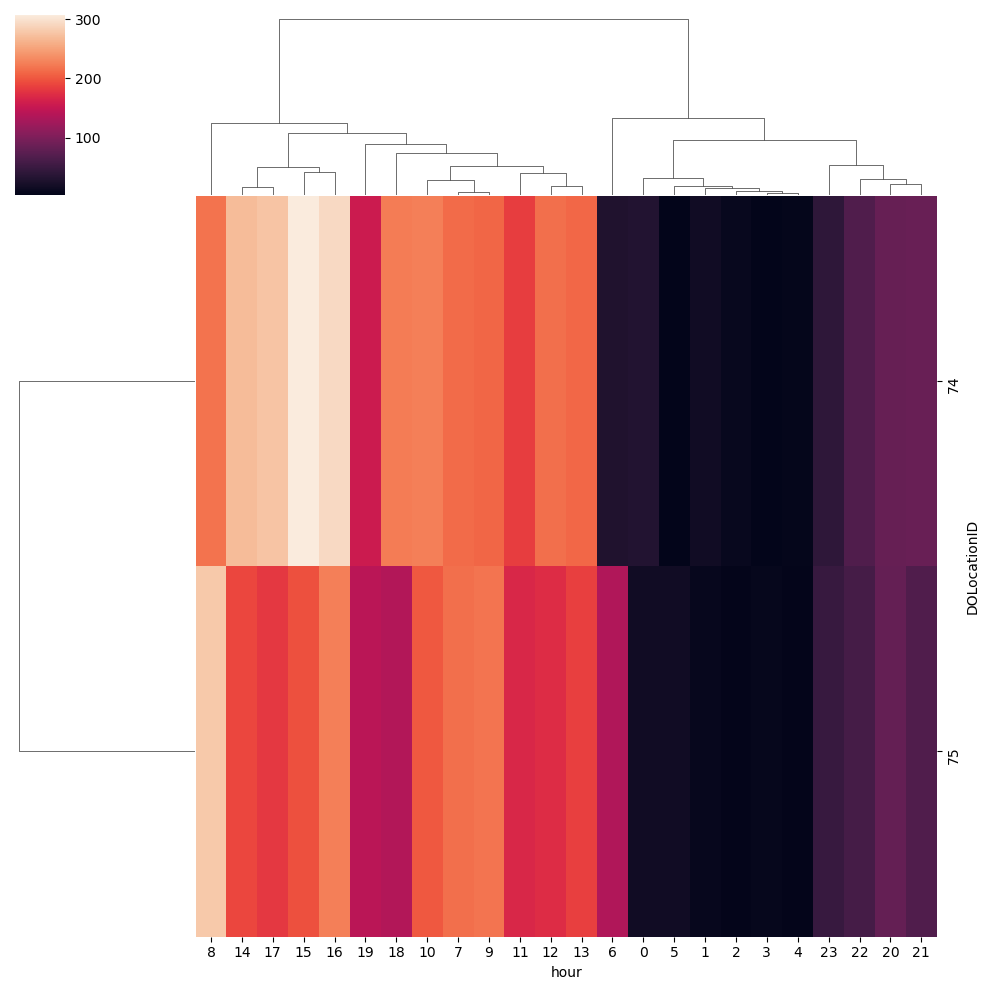

In [35]:
df_filtered = df[(df['DOLocationID'] == 74) | (df['DOLocationID'] == 75)]

# Create the frequency table
freq_table = pd.crosstab(df_filtered['DOLocationID'], df_filtered['hour'])

# Visualize the frequency table as a heatmap
sns.heatmap(freq_table)
plt.show()
sns.clustermap(freq_table)
plt.show()

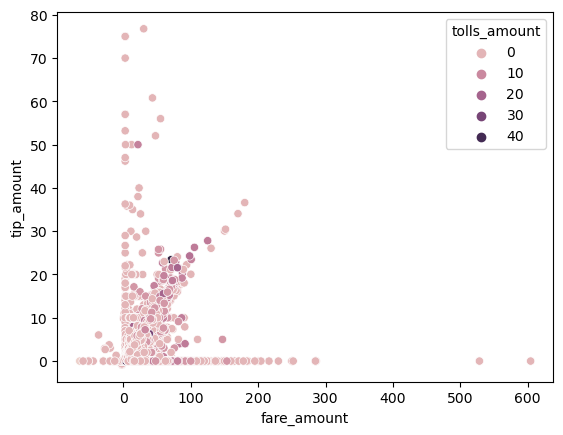

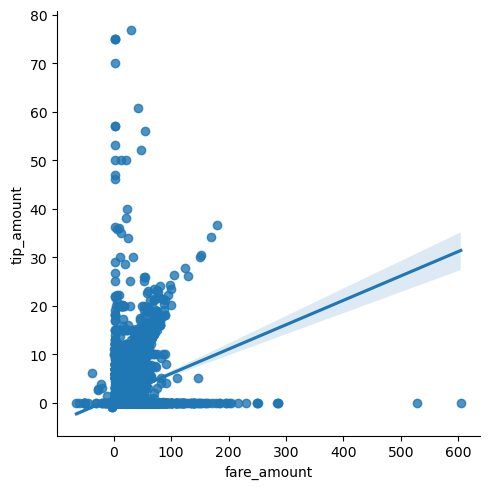

In [36]:
sns.scatterplot(x='fare_amount', y='tip_amount', hue='tolls_amount', data=df)

# Create a scatter plot with a regression line of the fare amount and the tip amount
sns.lmplot(x='fare_amount', y='tip_amount', data=df)

In [37]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                   category
DOLocationID                   category
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
pickup_day                       object
dropoff_day                      object
pickup_month                      int32
Dropoff_month                     int32
pickup_time                      object


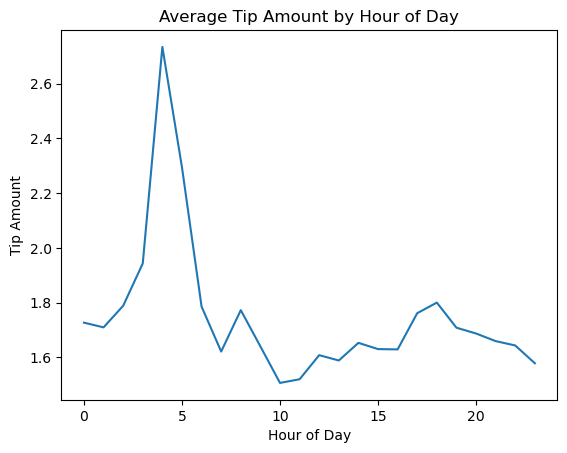

In [38]:
# Convert the lpep_pickup_datetime column to datetime format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

# Group the data by hour of day and calculate the average tip amount
tip_by_hour = df.groupby(df['lpep_pickup_datetime'].dt.hour)['tip_amount'].mean()

# Create a line plot of tip amount by hour of day
plt.plot(tip_by_hour.index, tip_by_hour.values)

# Set the title and axis labels
plt.title('Average Tip Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Tip Amount')

# Display the plot
plt.show()

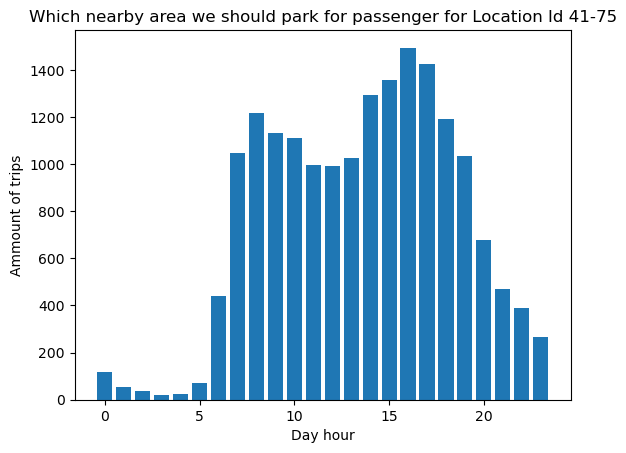

In [39]:
# Seleccionar los viajes al aeropuerto
location = df[(df["PULocationID"] == 74) | (df["PULocationID"] == 75)]

# Agregar los viajes por hora
hourly_trips = location.groupby(by=location["lpep_pickup_datetime"].dt.hour).size()


plt.bar(hourly_trips.index, hourly_trips.values)
plt.title("Which nearby area we should park for passenger for Location Id 41-75")
plt.xlabel("Day hour")
plt.ylabel("Ammount of trips")
plt.show()

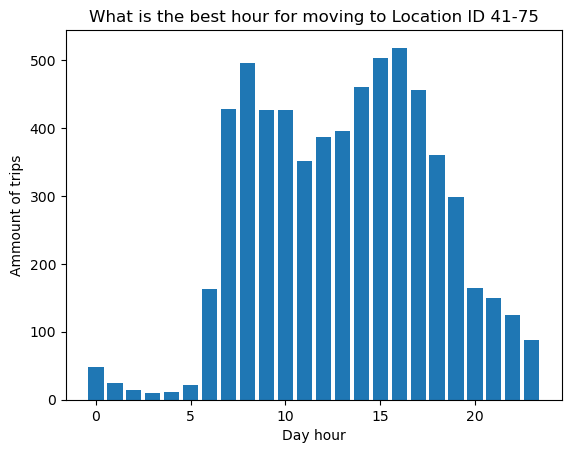

In [40]:
location = df[(df["DOLocationID"] == 74) | (df["DOLocationID"] == 75)]

# Agregar los viajes por hora
hourly_trips = location.groupby(by=location["lpep_pickup_datetime"].dt.hour).size()


plt.bar(hourly_trips.index, hourly_trips.values)
plt.title("What is the best hour for moving to Location ID 41-75")
plt.xlabel("Day hour")
plt.ylabel("Ammount of trips")
plt.show()

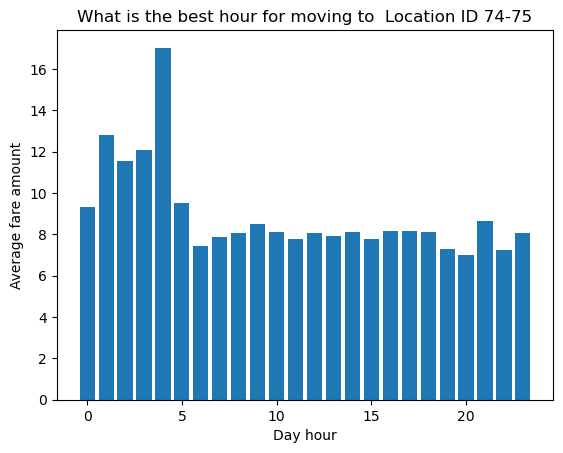

In [41]:
# Seleccionar los viajes al aeropuerto
location = df[(df["DOLocationID"] == 74) | (df["DOLocationID"] == 75)]

# Agregar los viajes por hora y tarifa promedio
hourly_fares = location.groupby(by=location["lpep_pickup_datetime"].dt.hour)["fare_amount"].mean()

# Hacer el gráfico de barras
plt.bar(hourly_fares.index, hourly_fares.values)
plt.title("What is the best hour for moving to  Location ID 74-75")
plt.xlabel("Day hour")
plt.ylabel("Average fare amount")
plt.show()

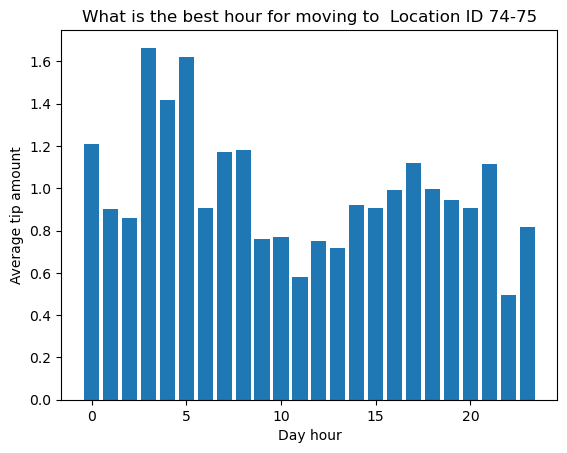

In [42]:
# Seleccionar los viajes al aeropuerto
location = df[(df["DOLocationID"] == 74) | (df["DOLocationID"] == 75)]

# Agregar los viajes por hora y tarifa promedio
hourly_fares = location.groupby(by=location["lpep_pickup_datetime"].dt.hour)["tip_amount"].mean()

# Hacer el gráfico de barras
plt.bar(hourly_fares.index, hourly_fares.values)
plt.title("What is the best hour for moving to  Location ID 74-75")
plt.xlabel("Day hour")
plt.ylabel("Average tip amount")
plt.show()

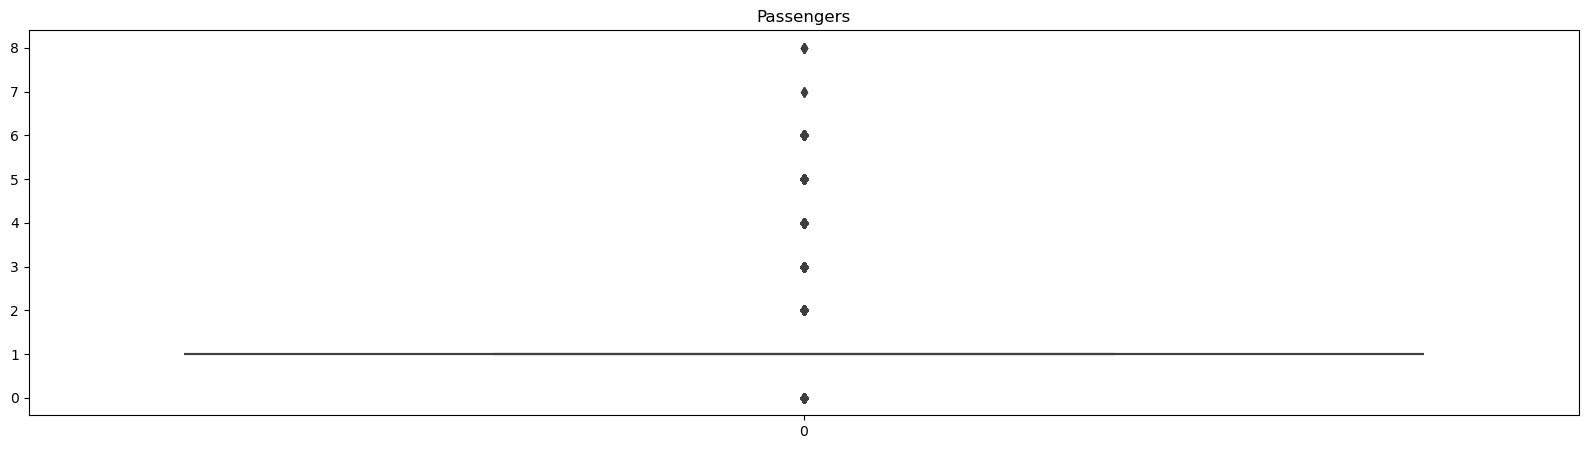

In [43]:
plt.figure(figsize = (20,5))
sns.boxplot(df.passenger_count)
plt.title('Passengers')
plt.show()

In [44]:
df.passenger_count.describe()

count    56200.000000
mean         1.258399
std          0.877743
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: passenger_count, dtype: float64

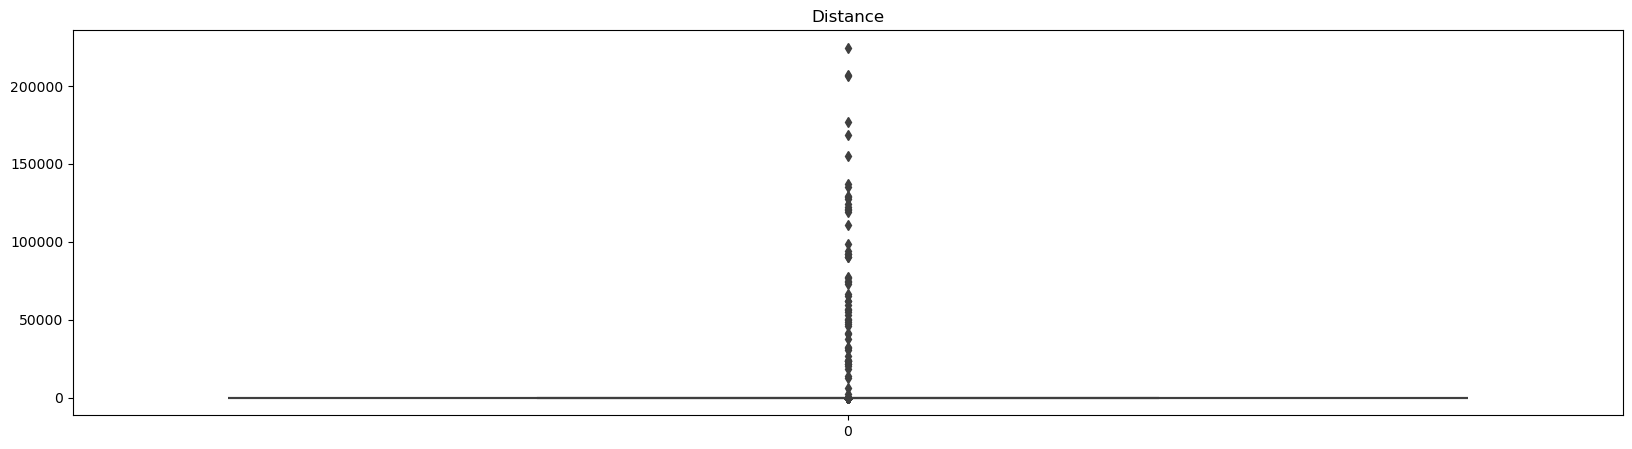

In [45]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_distance)
plt.title('Distance')
plt.show()

In [46]:
print("There are {} trip records with 0 km distance".format(df.trip_distance[df.trip_distance== 0 ].count()))

There are 3593 trip records with 0 km distance


C:\Users\Sazal\AppData\Local\Temp\ipykernel_7208\2231941097.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.trip_distance.groupby(pd.cut(df.trip_distance, np.arange(0,100,10))).count().plot(kind='barh')


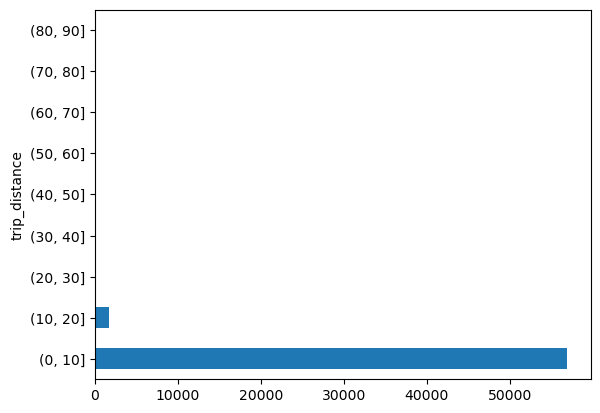

In [47]:
df.trip_distance.groupby(pd.cut(df.trip_distance, np.arange(0,100,10))).count().plot(kind='barh')
plt.show()

In [48]:
df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_day,dropoff_day,pickup_month,Dropoff_month,pickup_time,timezone,pickup_hour,dropoff_hour,trip_date,hour
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,Saturday,Saturday,1,1,00:14:21,Night,0,0,2022-01-01,0
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,Saturday,Saturday,1,1,00:20:55,Night,0,0,2022-01-01,0
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,Saturday,Saturday,1,1,00:57:02,Night,0,1,2022-01-01,0
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,Saturday,Saturday,1,1,00:07:42,Night,0,0,2022-01-01,0
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,Saturday,Saturday,1,1,00:07:50,Night,0,0,2022-01-01,0


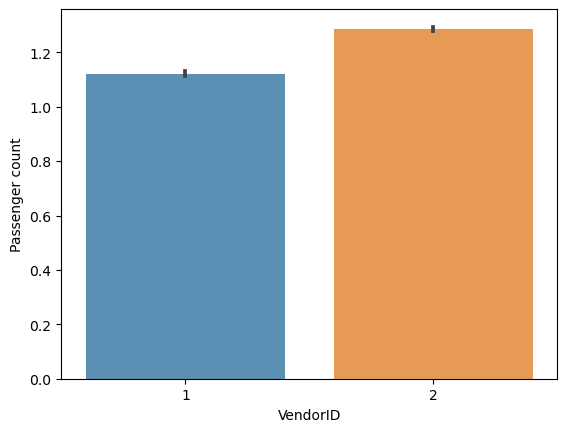

In [49]:
group9 = df.groupby('VendorID').passenger_count.mean()

sns.barplot(x=df.VendorID, y=df.passenger_count, alpha=0.8)
plt.ylabel('Passenger count')
plt.show()

In [50]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                   category
DOLocationID                   category
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
pickup_day                       object
dropoff_day                      object
pickup_month                      int32
Dropoff_month                     int32
pickup_time                      object


In [51]:
df1 = df.drop(columns=['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime','trip_distance','pickup_time'])

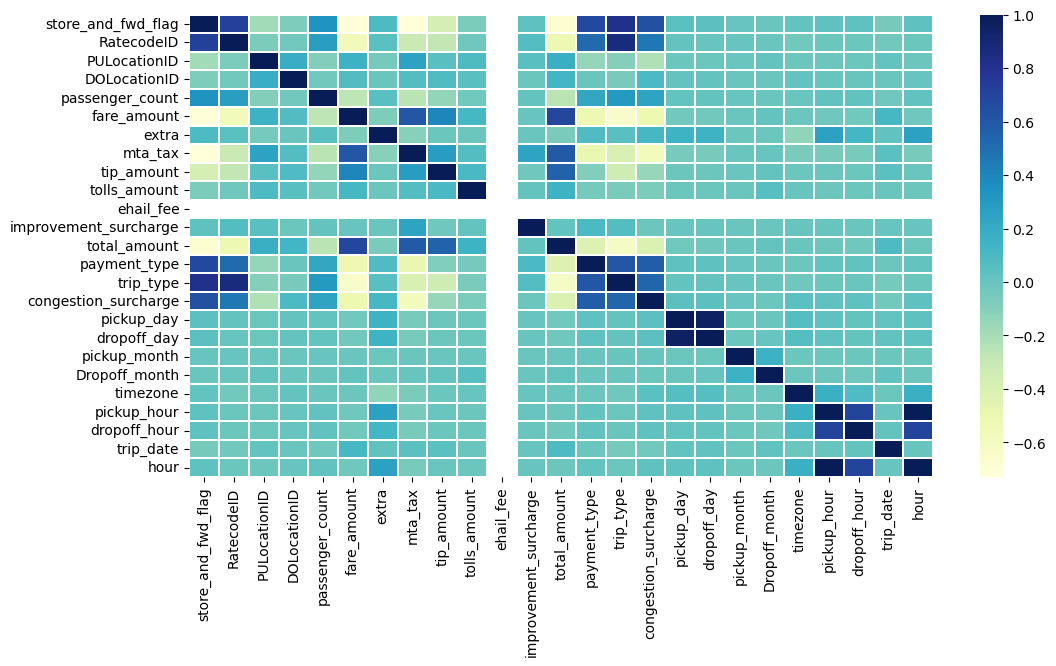

In [52]:
plt.figure(figsize=(12, 6))
corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()
#corr = df1.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")